# Loan approval Analysis

In [28]:
# Import Libraries

## Data manipulation
import numpy as np
import pandas as pd

## Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Preprocessing and Feature Scaling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

## Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import lightgbm as lgb
import xgboost as xgb

## Evaluation and Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv("loan_data.csv")

In [30]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [32]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [33]:
# Checking Missing Data
df.isna().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


### EDA

In [34]:
# Categorical columns check
categorical_columns = df.select_dtypes(include='object').columns

for column in categorical_columns:
    print(f"Column: {column}\n{df[column].value_counts()}\n")

Column: person_gender
person_gender
male      24841
female    20159
Name: count, dtype: int64

Column: person_education
person_education
Bachelor       13399
Associate      12028
High School    11972
Master          6980
Doctorate        621
Name: count, dtype: int64

Column: person_home_ownership
person_home_ownership
RENT        23443
MORTGAGE    18489
OWN          2951
OTHER         117
Name: count, dtype: int64

Column: loan_intent
loan_intent
EDUCATION            9153
MEDICAL              8548
VENTURE              7819
PERSONAL             7552
DEBTCONSOLIDATION    7145
HOMEIMPROVEMENT      4783
Name: count, dtype: int64

Column: previous_loan_defaults_on_file
previous_loan_defaults_on_file
Yes    22858
No     22142
Name: count, dtype: int64



### Categorical Column Plot analysis

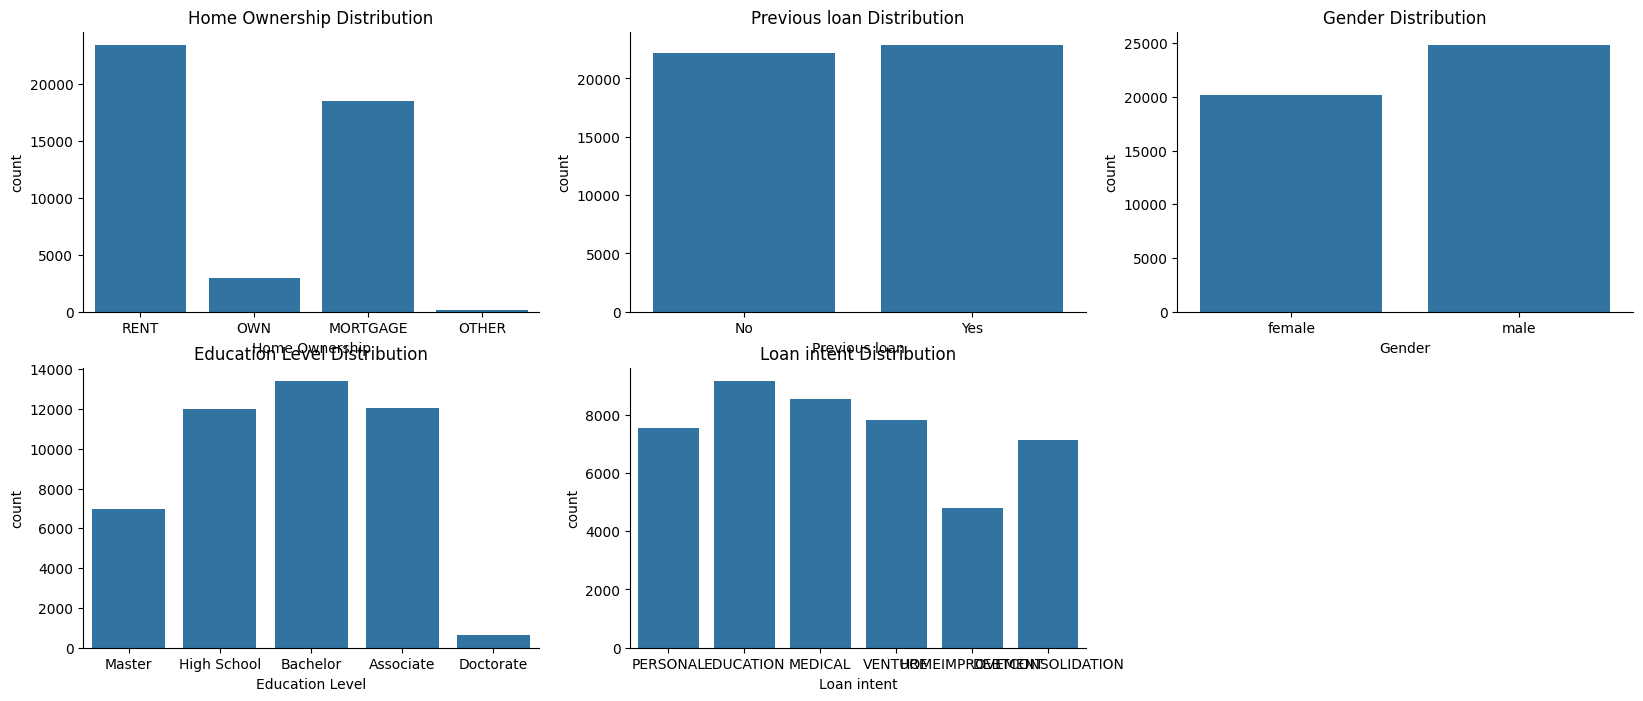

In [35]:
plot_cat = [
    ("person_home_ownership", "Home Ownership"),
    ("previous_loan_defaults_on_file", "Previous loan"),
    ("person_gender", "Gender"),
    ("person_education", "Education Level"),
    ("loan_intent", "Loan intent")
]


fig, axes = plt.subplots(2, 3, figsize=(20, 8))

for ax, (col, label) in zip(axes.flat, plot_cat):
    sns.countplot(x=col, data=df, ax=ax)
    ax.set_title(f"{label} Distribution")
    ax.set_xlabel(label)
    ax.set_ylabel("count")
    ax.tick_params(axis='x')

for ax in axes.flat[len(plot_cat):]:
    ax.remove()

sns.despine()
plt.show()

### Numerical column analysis

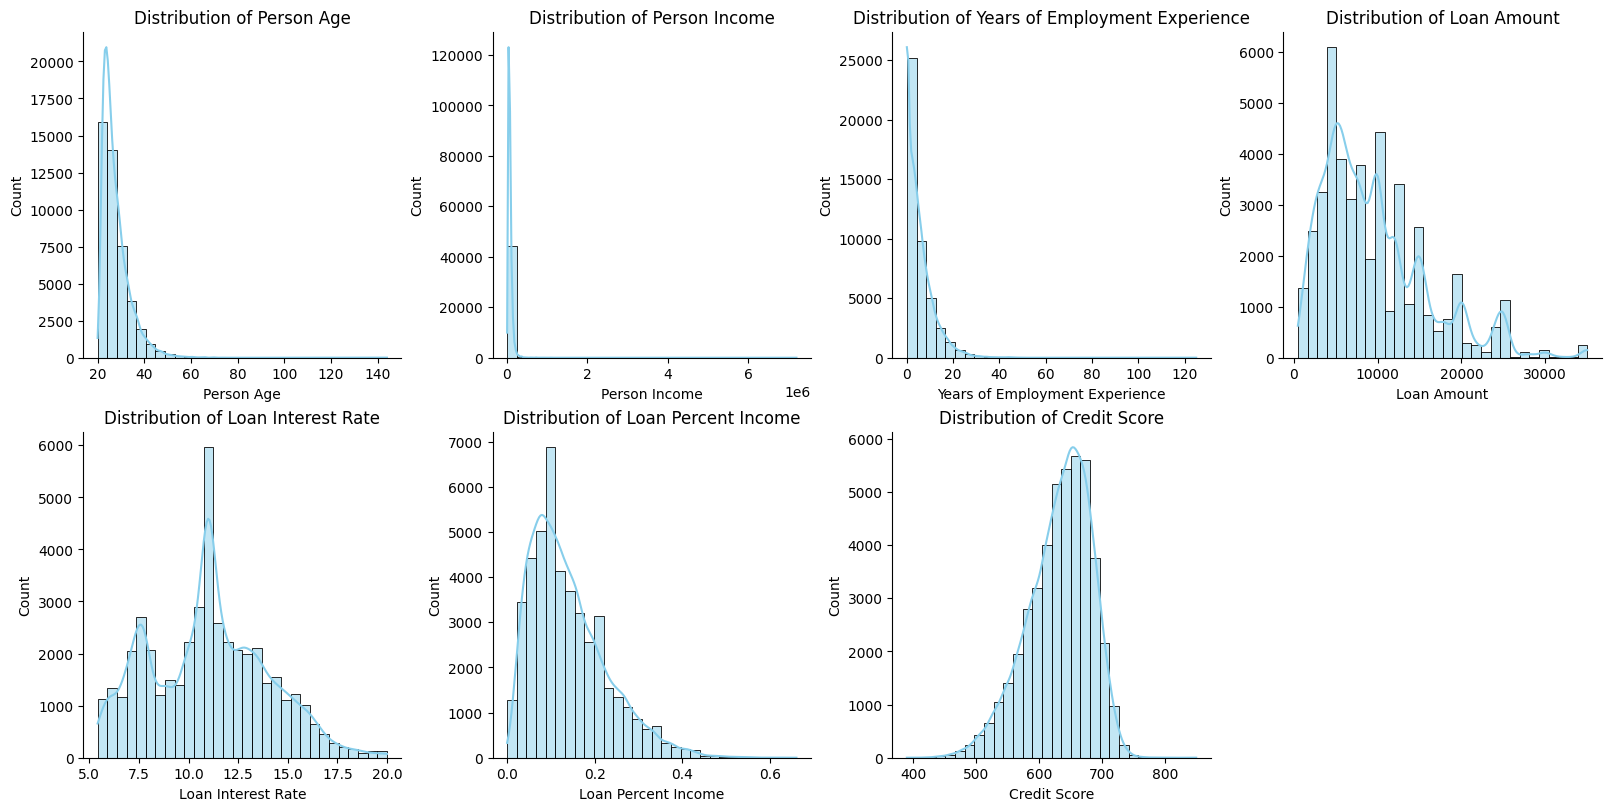

In [36]:
num_cols = [
    ("person_age", "Person Age"),
    ("person_income", "Person Income"),
    ("person_emp_exp", "Years of Employment Experience"),
    ("loan_amnt", "Loan Amount"),
    ("loan_int_rate", "Loan Interest Rate"),
    ("loan_percent_income", "Loan Percent Income"),
    ("credit_score", "Credit Score")
]

fig, axes = plt.subplots(2, 4, figsize=(16, 8), constrained_layout=True)

for ax, (col, label) in zip(axes.flat, num_cols):
    sns.histplot(data=df, x=col, kde=True, bins=30, ax=ax, color="skyblue")
    ax.set_title(f"Distribution of {label}")
    ax.set_xlabel(label)
    ax.set_ylabel("Count")

for ax in axes.flat[len(num_cols):]:
    ax.remove()

sns.despine()
plt.show()

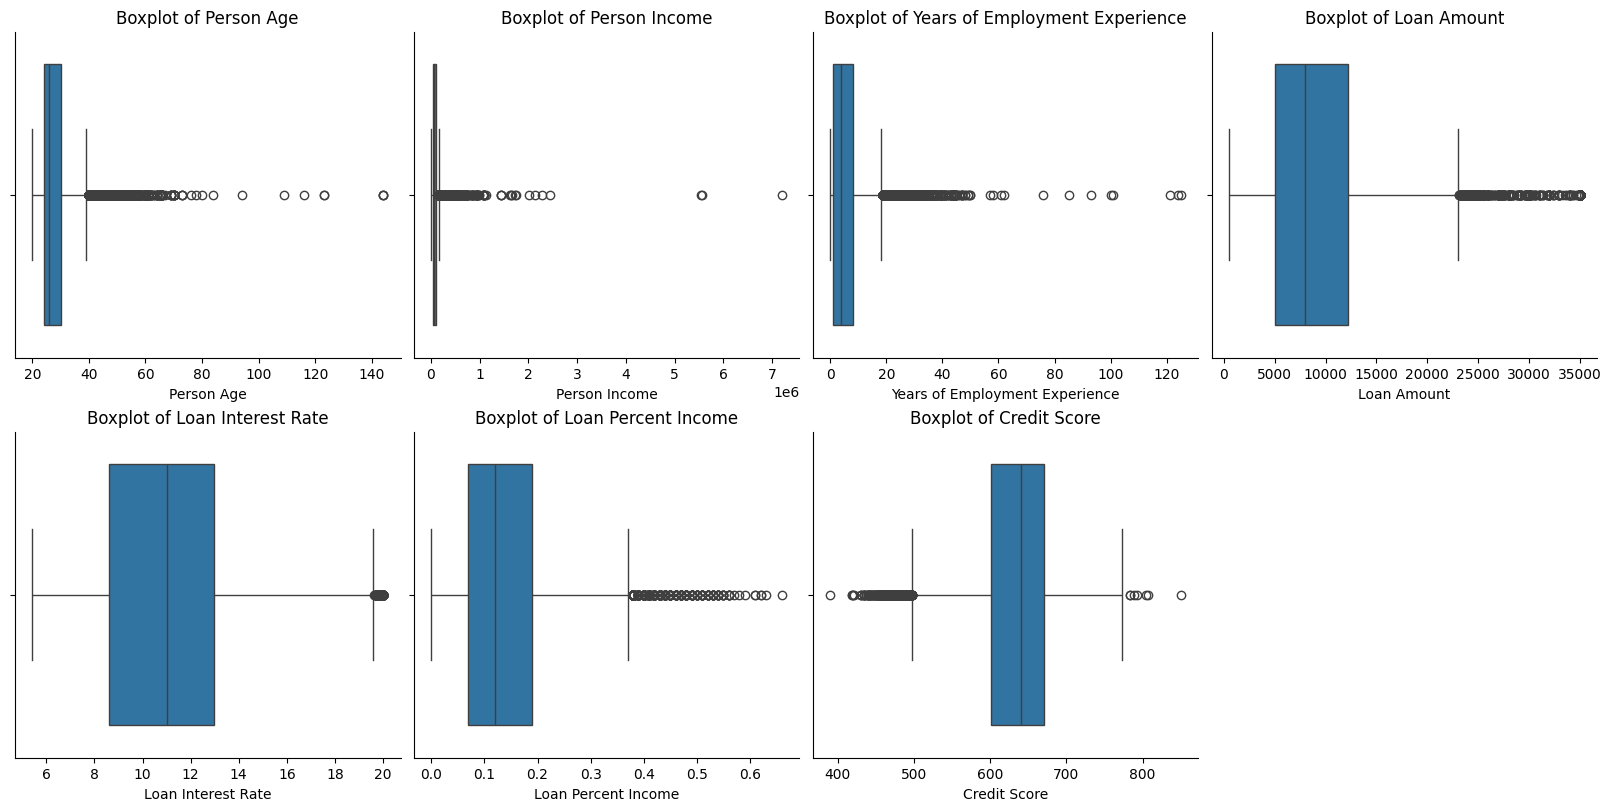

In [37]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8), constrained_layout=True)

for ax, (col, label) in zip(axes.flat, num_cols):
    sns.boxplot(data=df, x=col, ax=ax)
    ax.set_title(f"Boxplot of {label}")
    ax.set_xlabel(label)
    ax.set_ylabel("")

for ax in axes.flat[len(num_cols):]:
    ax.remove()

sns.despine()
plt.show()


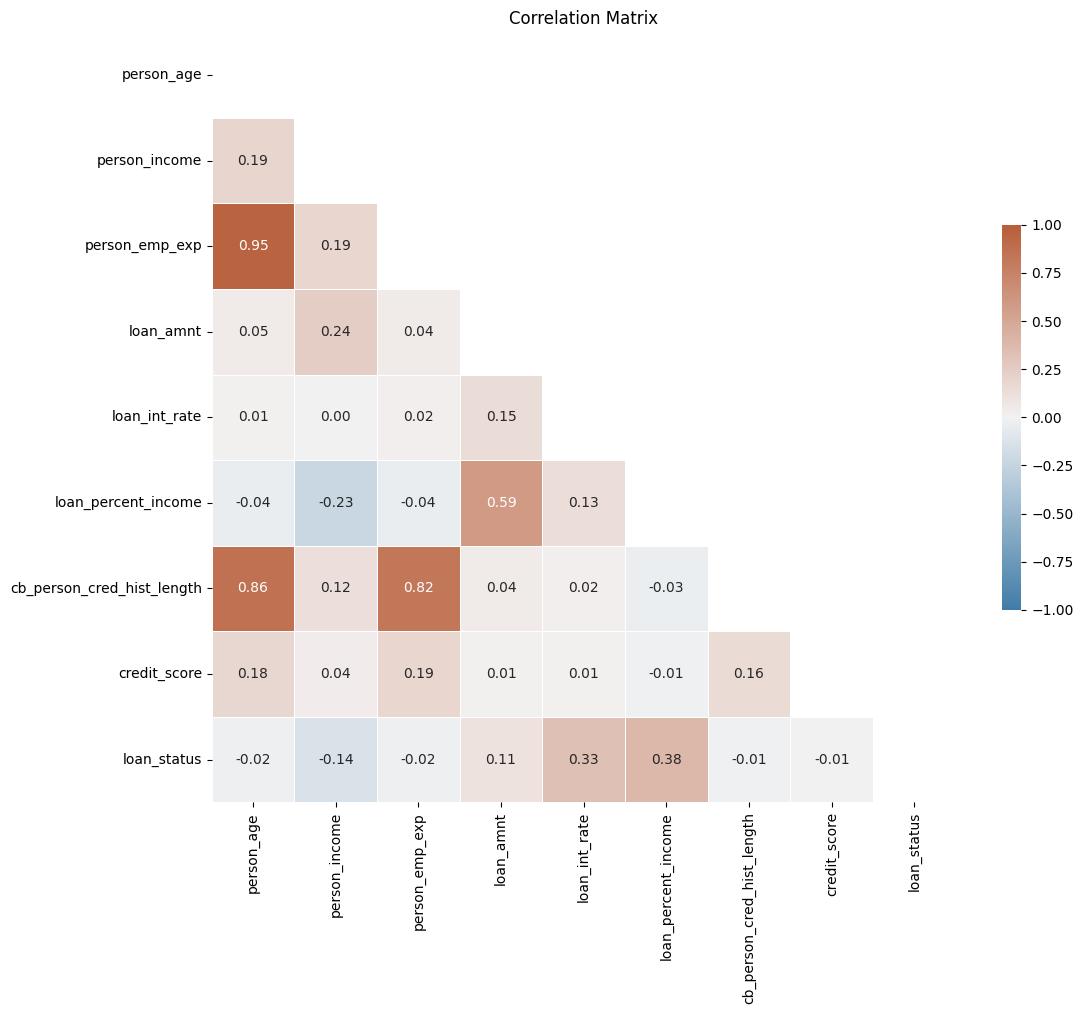

In [38]:
corr_matrix = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
fig, ax = plt.subplots(figsize=(12, 10))
cmap = sns.diverging_palette(240, 25, as_cmap=True)
sns.heatmap(
    corr_matrix,
    mask=mask,
    cmap=cmap,
    center=0,
    annot=True,
    fmt=".2f",
    vmin=-1, vmax=1,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
    ax=ax
)
ax.set_title("Correlation Matrix")
plt.show()

### Customers' age analysis

In [39]:
df["person_age_bins"] = pd.cut(
    df["person_age"],
    bins=[20, 25, 30, 40, 50, 60, 100],
    labels=["20-25","25-30", "30-40", "40-50", "50-60", "60+"]
)

print(df["person_age_bins"].value_counts())
print(df["person_age_bins"].isnull().sum())

person_age_bins
20-25    20424
25-30    13958
30-40     8762
40-50     1511
50-60      250
60+         71
Name: count, dtype: int64
24


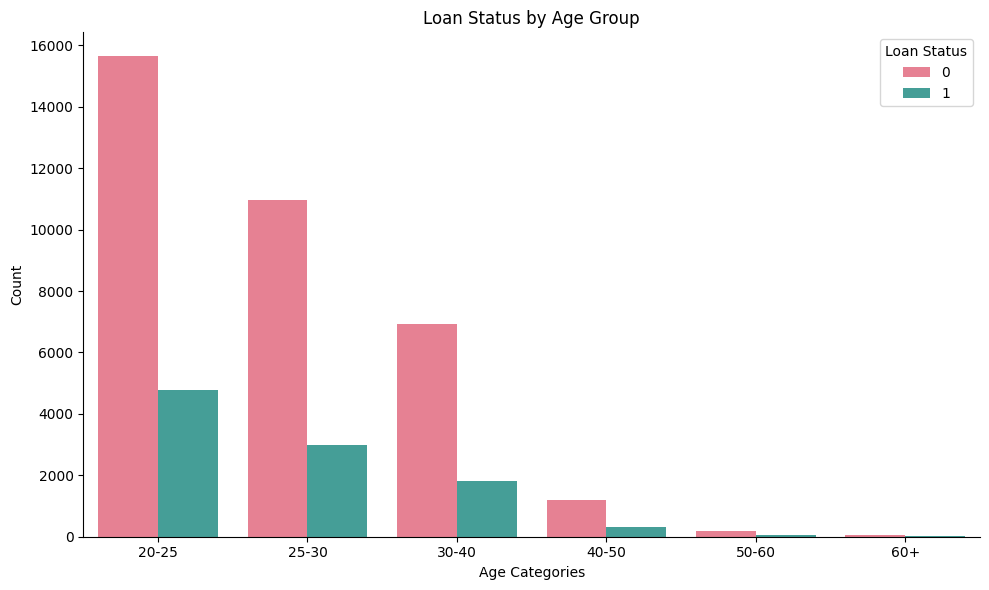

In [40]:
age=adjust_legend_subtitles = (
    df.groupby(['person_age_bins', 'loan_status'], observed=False)
    .size()
    .reset_index(name='count')
)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=age,
    x='person_age_bins',
    y='count',
    hue='loan_status',
    palette='husl'
)

plt.title('Loan Status by Age Group')
plt.xlabel('Age Categories')
plt.ylabel('Count')
plt.legend(title='Loan Status')

plt.tight_layout()
sns.despine()

plt.show()

<ipython-input-41-76aca85ace83>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('person_age_bins')['loan_status']


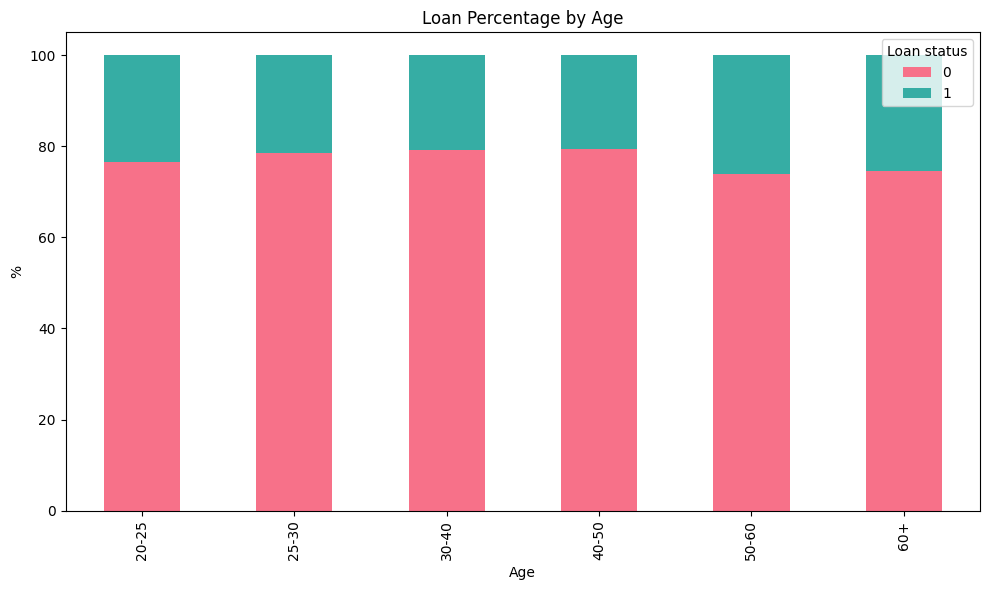

In [41]:
loan_percentage_by_age = (
    df.groupby('person_age_bins')['loan_status']
    .value_counts(normalize=True)
    .mul(100)
    .unstack()
)

loan_percentage_by_age.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=sns.color_palette('husl', n_colors=loan_percentage_by_age.shape[1])
)

plt.title('Loan Percentage by Age')
plt.xlabel('Age')
plt.ylabel('%')
plt.legend(title='Loan status')

plt.tight_layout()
plt.show()

**Conclusion**:

The younger generation appears to be the favored customer of the bank. However the reject percentage is almost the same across all age group.

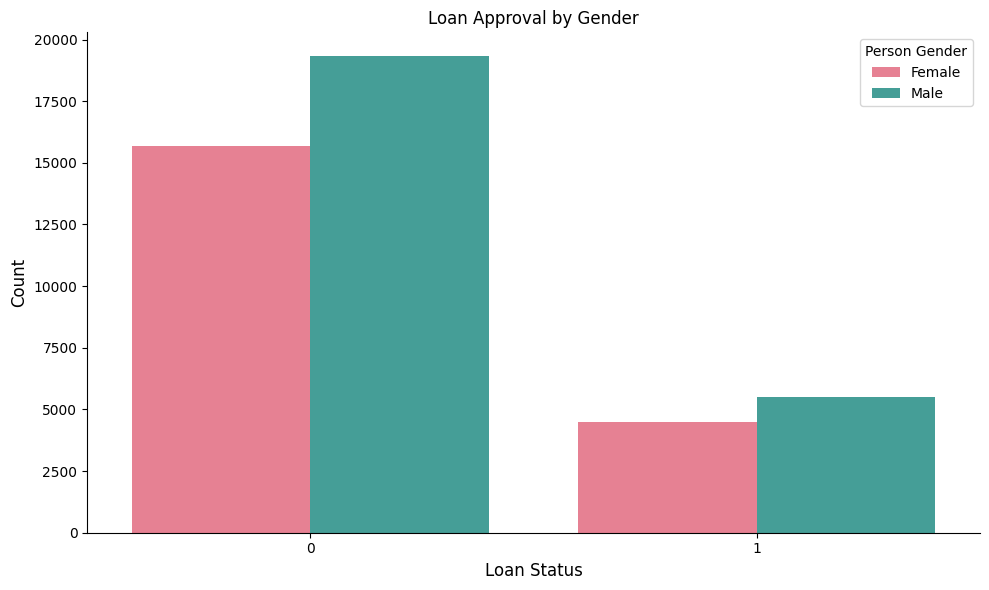

In [42]:
gender_loan = df.groupby(["person_gender", "loan_status"]).size().reset_index(name="count")

plt.figure(figsize=(10, 6))
sns.barplot(
    x="loan_status",
    y="count",
    hue="person_gender",
    data=gender_loan,
    palette="husl"
)

plt.xlabel("Loan Status", fontsize=12)
plt.ylabel("Count", fontsize=12)

handles, labels = plt.gca().get_legend_handles_labels()
labels = [label.capitalize() for label in labels]
plt.legend(handles, labels, title="Person Gender")

plt.title("Loan Approval by Gender")

sns.despine()
plt.tight_layout()

plt.show()

### Loan Approval by intent

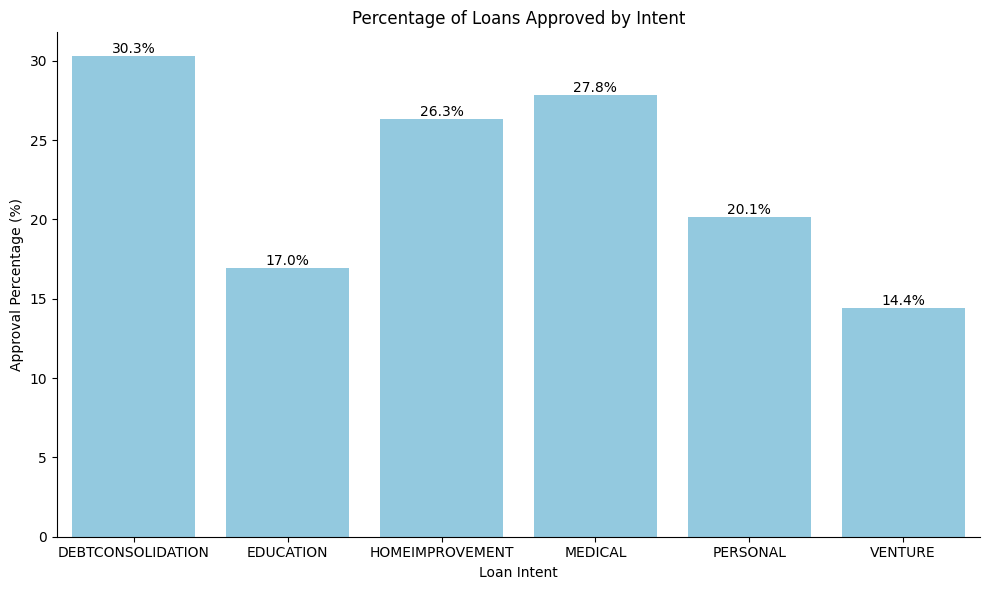

In [43]:
loan_intent_df = (
    df.groupby('loan_intent')['loan_status']
    .value_counts(normalize=True)
    .mul(100)
    .rename('percent')
    .reset_index()
)

loan_intent_df = loan_intent_df[loan_intent_df['loan_status'] == 1]

plt.figure(figsize=(10, 6))
sns.barplot(
    x='loan_intent',
    y='percent',
    data=loan_intent_df,
    color='skyblue'
)

for p in plt.gca().patches:
    percentage = '{:.1f}%'.format(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    plt.gca().annotate(percentage, (x, y), ha='center', va='bottom')

plt.title('Percentage of Loans Approved by Intent')
plt.xlabel('Loan Intent')
plt.ylabel('Approval Percentage (%)')
plt.tight_layout()
sns.despine()

plt.show()

Conclusion: The bank is likely to give a loan for debt consolidation, home improvement and medical intents.

### Home Ownership

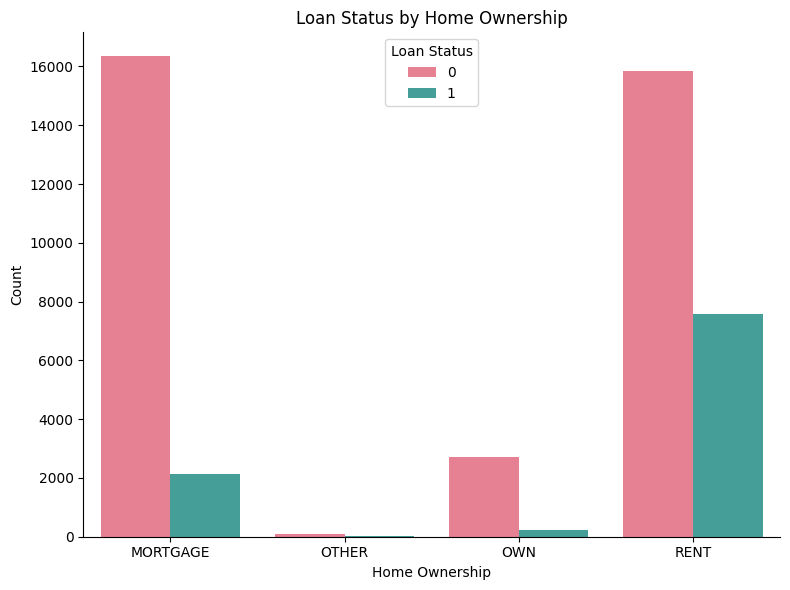

In [44]:
group_data = df.groupby(['person_home_ownership', 'loan_status']).size().reset_index(name='count')

plt.figure(figsize=(8, 6))
sns.barplot(
    data=group_data,
    x='person_home_ownership',
    y='count',
    hue='loan_status',
    palette="husl"
)

plt.title("Loan Status by Home Ownership")
plt.xlabel("Home Ownership")
plt.ylabel("Count")
plt.legend(title="Loan Status")

sns.despine()
plt.tight_layout()

plt.show()

<ipython-input-45-48f057882fbe>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='person_home_ownership', y='percent', data=home_ownership_approval, palette='viridis')


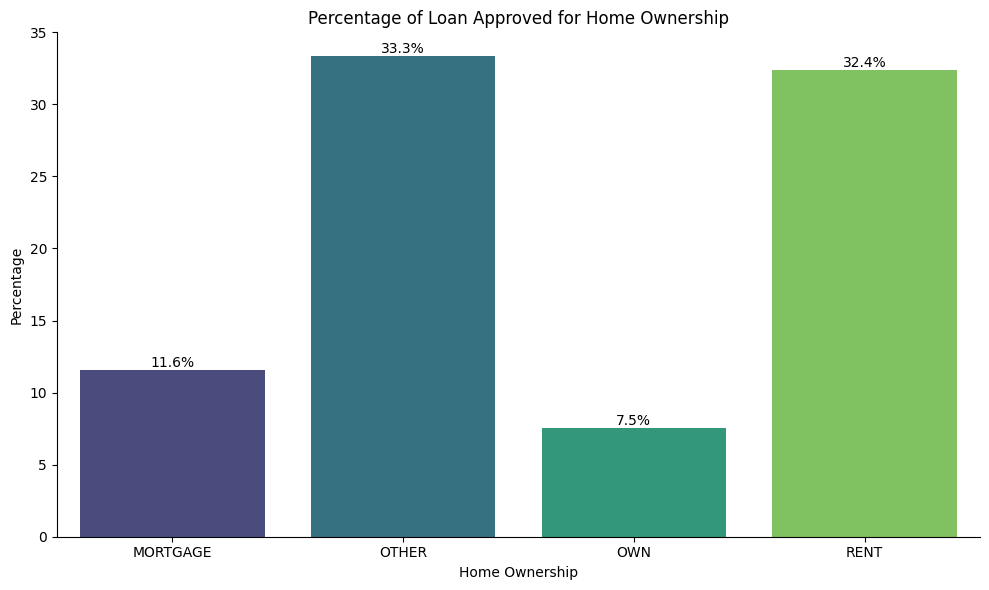

In [45]:
home_ownership_approval = df.groupby('person_home_ownership')['loan_status'].value_counts(normalize=True).mul(100).rename('percent').reset_index()
home_ownership_approval = home_ownership_approval[home_ownership_approval['loan_status'] == 1]

plt.figure(figsize=(10, 6))
sns.barplot(x='person_home_ownership', y='percent', data=home_ownership_approval, palette='viridis')

for i, p in enumerate(plt.gca().patches):
    percentage = '{:.1f}%'.format(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    plt.gca().annotate(percentage, (x, y), ha='center', va='bottom')

plt.title('Percentage of Loan Approved for Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Percentage')

plt.tight_layout()
sns.despine()
plt.show()

**Conclusion**: The bank is likely to accept loans for rental homes, where mortage and home owners is less likely to receive a loan.

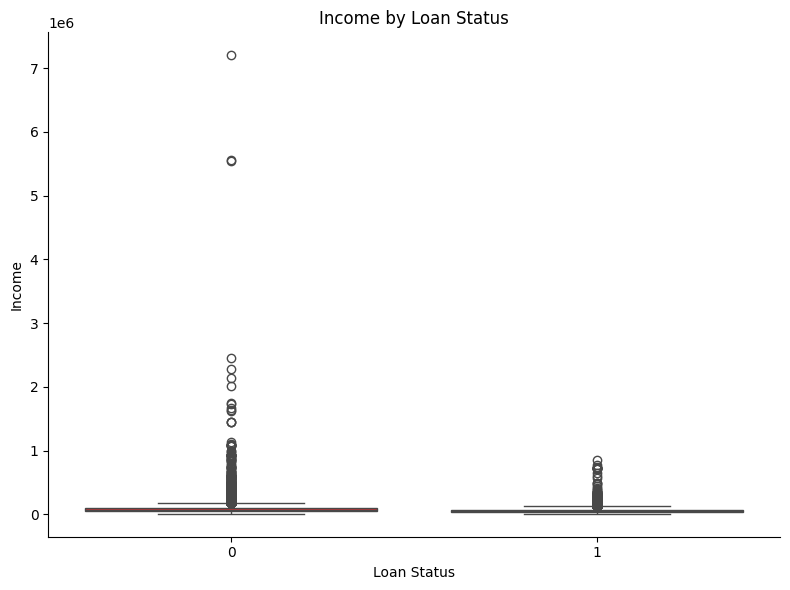

In [46]:
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df,
    x="loan_status",
    y="person_income",
    hue="loan_status",
    palette="Set1",
    legend=False
)
plt.title("Income by Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Income")

sns.despine()
plt.tight_layout()
plt.show()

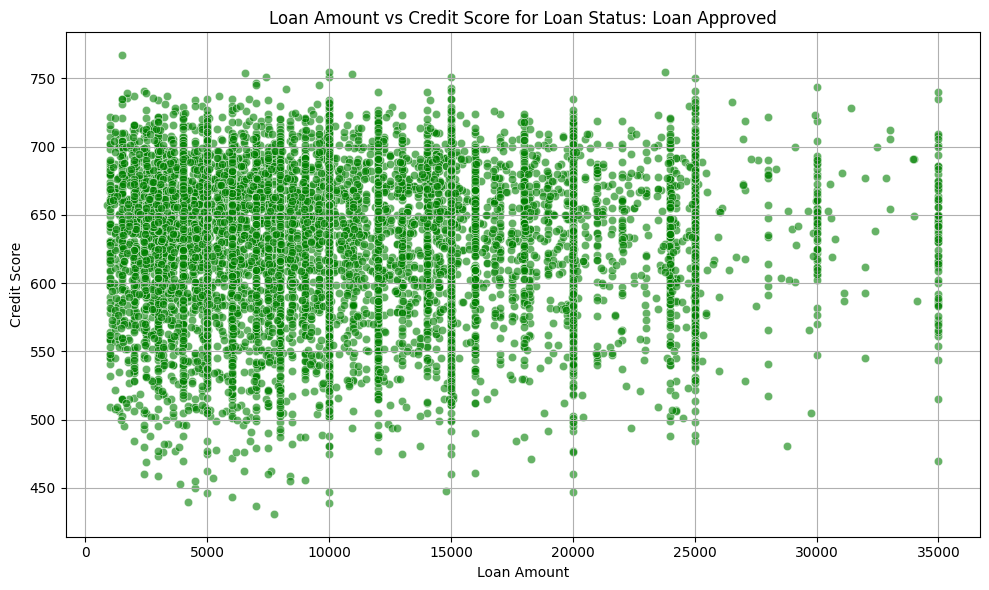

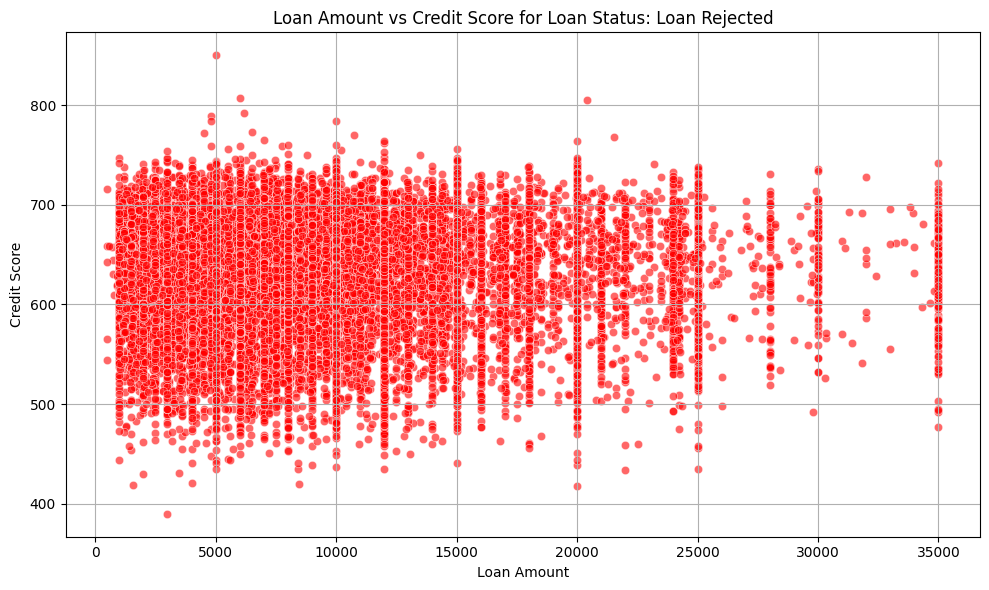

In [47]:
loan_statuses = df['loan_status'].unique()

name = {
    0: "Loan Rejected",
    1: "Loan Approved"
}
colors={
    0: "red",
    1: "green"
}
for status in loan_statuses:
    subset = df[df['loan_status'] == status]
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=subset, x='loan_amnt', y='credit_score', alpha=0.6, color=colors[status])
    plt.title(f'Loan Amount vs Credit Score for Loan Status: {name[status]}')
    plt.xlabel('Loan Amount')
    plt.ylabel('Credit Score')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

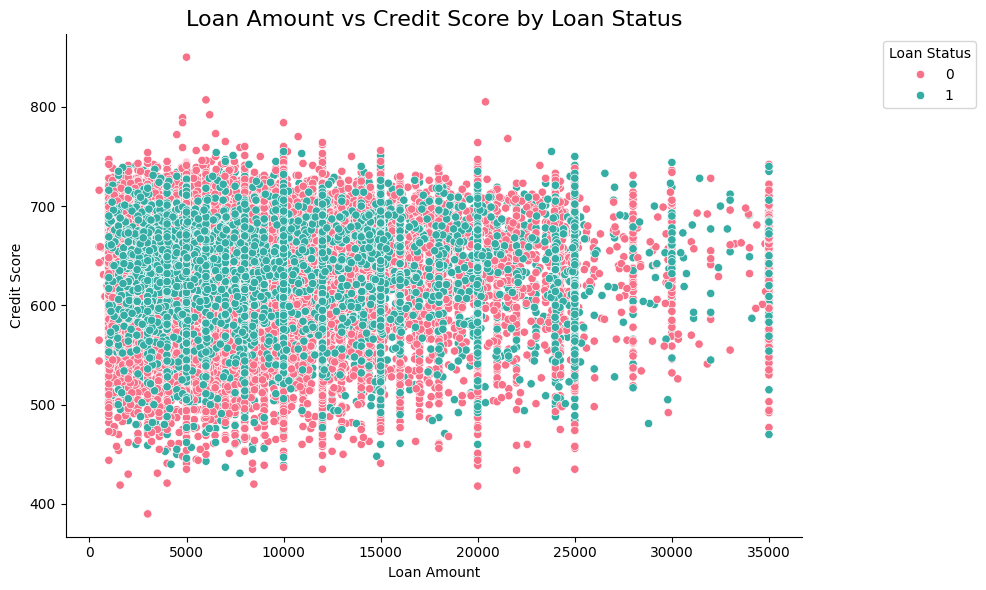

In [48]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='loan_amnt',
    y='credit_score',
    hue='loan_status',
    data=df,
    palette="husl"
)

plt.title("Loan Amount vs Credit Score by Loan Status", fontsize=16)
plt.xlabel("Loan Amount")
plt.ylabel("Credit Score")


plt.legend(
    title="Loan Status",
    bbox_to_anchor=(1.1, 1),
    loc="upper left"
)

sns.despine()

plt.tight_layout()

plt.show()


**Conclusion**: There is not a significant pattern of loan amount and credit score. High Credit Scorer can have their loan ignored.

### Predicting Model

In [50]:
model_df = df.copy()
model_df = model_df.drop("person_age_bins", axis=1)
model_df["loan_status"] = model_df["loan_status"].astype(int)
categorical_columns = model_df.select_dtypes(include='object').columns
model_df = pd.get_dummies(model_df, columns=categorical_columns, drop_first=True)
print(model_df.head())

   person_age  person_income  person_emp_exp  loan_amnt  loan_int_rate  \
0        22.0        71948.0               0    35000.0          16.02   
1        21.0        12282.0               0     1000.0          11.14   
2        25.0        12438.0               3     5500.0          12.87   
3        23.0        79753.0               0    35000.0          15.23   
4        24.0        66135.0               1    35000.0          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  loan_status  \
0                 0.49                         3.0           561            1   
1                 0.08                         2.0           504            0   
2                 0.44                         3.0           635            1   
3                 0.44                         2.0           675            1   
4                 0.53                         4.0           586            1   

   person_gender_male  ...  person_education_Master  \
0            

In [52]:
X = model_df.drop('loan_status', axis=1)
y = model_df['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model used
rf_model = RandomForestClassifier(random_state=42)
knn_model = KNeighborsClassifier()
lgbm_model = lgb.LGBMClassifier(random_state=42)
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

models = {
    'Random Forest': rf_model,
    'KNN': knn_model,
    'LGBM': lgbm_model,
    'XGBoost': xgb_model
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Classification Report for {name}:\n{classification_report(y_test, y_pred)}")

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      6990
           1       0.90      0.77      0.83      2010

    accuracy                           0.93      9000
   macro avg       0.92      0.87      0.89      9000
weighted avg       0.93      0.93      0.93      9000

Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      6990
           1       0.78      0.69      0.73      2010

    accuracy                           0.89      9000
   macro avg       0.85      0.82      0.83      9000
weighted avg       0.89      0.89      0.89      9000



/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 7990, number of negative: 28010
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.044594 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1231
[LightGBM] [Info] Number of data points in the train set: 36000, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221944 -> initscore=-1.254371
[LightGBM] [Info] Start training from score -1.254371


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Classification Report for LGBM:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      6990
           1       0.89      0.80      0.84      2010

    accuracy                           0.93      9000
   macro avg       0.92      0.89      0.90      9000
weighted avg       0.93      0.93      0.93      9000



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:32:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      6990
           1       0.89      0.80      0.84      2010

    accuracy                           0.93      9000
   macro avg       0.92      0.89      0.90      9000
weighted avg       0.93      0.93      0.93      9000



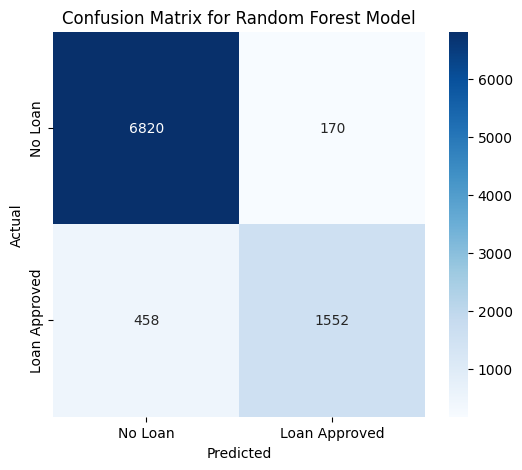

In [53]:
rf_cm = confusion_matrix(y_test, rf_model.predict(X_test_scaled))
plt.figure(figsize=(6, 5))
sns.heatmap(rf_cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Loan", "Loan Approved"], yticklabels=["No Loan", "Loan Approved"])
plt.title("Confusion Matrix for Random Forest Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

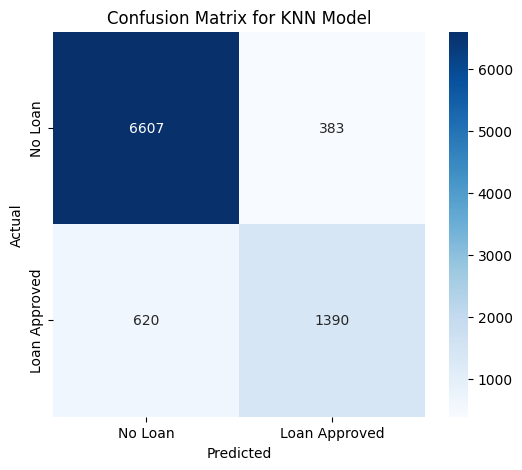

In [54]:
knn_cm = confusion_matrix(y_test, knn_model.predict(X_test_scaled))
plt.figure(figsize=(6, 5))
sns.heatmap(knn_cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Loan", "Loan Approved"], yticklabels=["No Loan", "Loan Approved"])
plt.title("Confusion Matrix for KNN Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


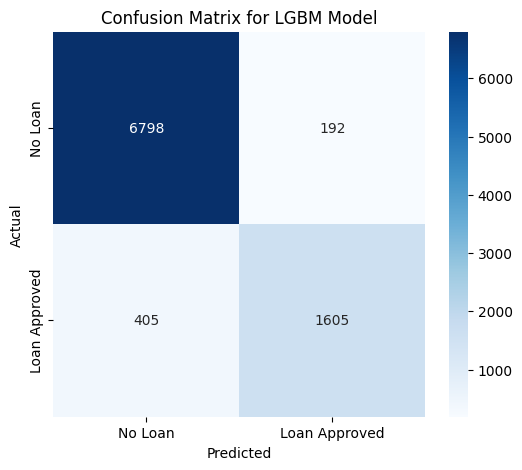

In [55]:
lgbm_cm = confusion_matrix(y_test, lgbm_model.predict(X_test_scaled))
plt.figure(figsize=(6, 5))
sns.heatmap(lgbm_cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Loan", "Loan Approved"], yticklabels=["No Loan", "Loan Approved"])
plt.title("Confusion Matrix for LGBM Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

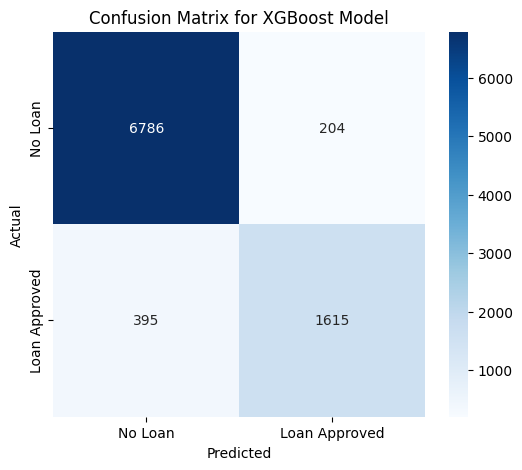

In [56]:
xgb_cm = confusion_matrix(y_test, xgb_model.predict(X_test_scaled))
plt.figure(figsize=(6, 5))
sns.heatmap(xgb_cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Loan", "Loan Approved"], yticklabels=["No Loan", "Loan Approved"])
plt.title("Confusion Matrix for XGBoost Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**Conclusion**:

Based on the result, LGBM model produce the better outcome, especially has the lowest outcome of False Positive (Predict Loan Approved - Actual No Loan)